In [1]:
import numpy as np
import os
import h5py
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def filter_dataset(meta_path):
    f = h5py.File(meta_path, 'r')
    dset = f['Evaluation']
    y_actual = []
    y_predicted = []
    for trace in dset:
        y_predicted.append("{}-{}".format(trace['Predicted Compressor'].decode(), trace['Predicted Level']))
        if trace['Ideal Level'] == 0:
            y_actual.append("{}-{}".format(trace['Predicted Compressor'].decode(), trace['Predicted Level']))
        else:
            y_actual.append("{}-{}".format(trace['Ideal Compressor'].decode(), trace['Ideal Level']))
    return (y_actual, y_predicted)

In [3]:
META_PATH = 'evaluation.h5'
y_actual, y_predicted = filter_dataset(META_PATH)

In [4]:
y_actual = pd.Series(y_actual, name='True Compressor')
y_predicted = pd.Series(y_predicted, name='Predicted Compressor')

df_confusion = pd.crosstab(y_actual, y_predicted)

df_confusion = df_confusion.reindex(columns=df_confusion.index.values, fill_value=0)


df_conf_norm = df_confusion / df_confusion.sum(axis=1)

print(df_confusion.shape)
print(df_confusion)

(7, 7)
Predicted Compressor  LZ4-12  ZLIB-6  ZLIB-9  ZSTD-1  ZSTD-10  ZSTD-22  ZSTD-3
True Compressor                                                               
LZ4-12                     0       0       0       0       16        0       0
ZLIB-6                     0    2283       0       0        0       81       0
ZLIB-9                     0      73     133       9      173     2278     360
ZSTD-1                     0       9       0      14      113       17       3
ZSTD-10                    0     127       4       2     2463      106       1
ZSTD-22                    0     110     134       0      225    10513       5
ZSTD-3                     0     292       4       3      647       63     955


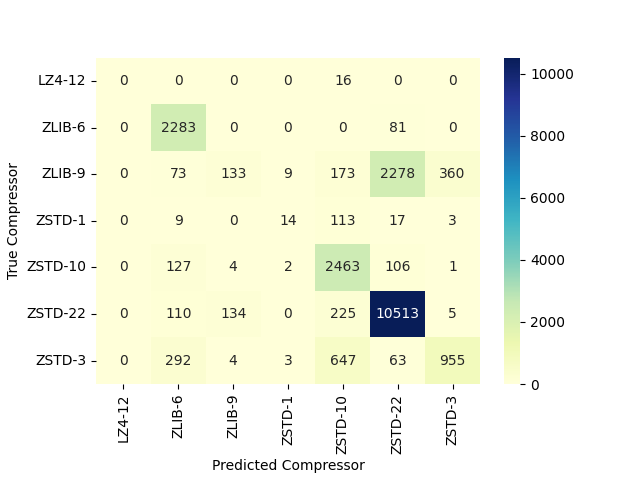

In [6]:
%matplotlib widget
sns.heatmap(df_confusion, annot=True, fmt="d", cmap="YlGnBu")
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.2)

plt.show()